<a href="https://colab.research.google.com/github/camigutie/EDA/blob/main/Voting_Camila's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Project 3: build predictive algorithms that predict the likelihood a person votes Democratic or Republican

# clone from repo
! git clone https://github.com/Catherine-Nguyen88/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 211 (delta 61), reused 45 (delta 18), pack-reused 90
Receiving objects: 100% (211/211), 65.69 MiB | 5.73 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Updating files: 100% (66/66), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Load data
df = pd.read_csv('/content/project_voting/voting_est.csv')
df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,...,Female: 50 to 54 years,Female: 55 to 59 years,Female: 60 and 61 years,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over
0,2008,VIRGINIA,VA,Accomack,51001,US PRESIDENT,BARACK OBAMA,DEMOCRAT,7607,15623,...,1446.0,1316.0,727.0,638.0,369.0,690.0,806.0,791.0,441.0,412.0
1,2008,VIRGINIA,VA,Accomack,51001,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,7833,15623,...,1446.0,1316.0,727.0,638.0,369.0,690.0,806.0,791.0,441.0,412.0
2,2008,VIRGINIA,VA,Accomack,51001,US PRESIDENT,OTHER,OTHER,183,15623,...,1446.0,1316.0,727.0,638.0,369.0,690.0,806.0,791.0,441.0,412.0
3,2008,VIRGINIA,VA,Albemarle,51003,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29792,50984,...,3889.0,3840.0,1251.0,1468.0,1038.0,1161.0,1884.0,1546.0,1470.0,1269.0
4,2008,VIRGINIA,VA,Albemarle,51003,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,20576,50984,...,3889.0,3840.0,1251.0,1468.0,1038.0,1161.0,1884.0,1546.0,1470.0,1269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2020,VIRGINIA,VA,Winchester,51840,US PRESIDENT,OTHER,OTHER,24,12113,...,1074.0,781.0,322.0,532.0,338.0,500.0,677.0,511.0,285.0,338.0
2968,2020,VIRGINIA,VA,Winchester,51840,US PRESIDENT,OTHER,OTHER,0,12113,...,1074.0,781.0,322.0,532.0,338.0,500.0,677.0,511.0,285.0,338.0
2969,2020,VIRGINIA,VA,Winchester,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,...,1074.0,781.0,322.0,532.0,338.0,500.0,677.0,511.0,285.0,338.0
2970,2020,VIRGINIA,VA,Winchester,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,...,1074.0,781.0,322.0,532.0,338.0,500.0,677.0,511.0,285.0,338.0


In [3]:
print(df.shape)
df.head()

df.describe()

(2972, 72)


,year,county_fips,candidatevotes,totalvotes,Not Hispanic or Latino: White alone,Not Hispanic or Latino: Black or African American alone,Not Hispanic or Latino: American Indian and Alaska Native alone,Not Hispanic or Latino: Asian alone,Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone,Not Hispanic or Latino: Two or more races,...,Female: 50 to 54 years,Female: 55 to 59 years,Female: 60 and 61 years,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over
count,2972.000000,2972.000000,2972.000000,2972.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,...,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,2016.535666,51271.804845,6470.719717,35541.353634,43542.115937,13049.201778,136.422025,5404.604651,40.427155,2188.100889,...,2557.636115,2473.215116,952.958276,1273.814979,763.751026,1048.166553,1383.868331,991.606703,710.663475,778.820451
std,4.517039,273.697032,22751.672883,76022.481451,78981.664075,24993.178918,255.300610,26516.103334,109.242265,5687.051770,...,5585.822874,5191.000214,1910.788273,2489.288743,1455.629746,1970.154049,2521.705827,1722.207391,1195.018633,1363.357421
min,2008.000000,51001.000000,0.000000,0.000000,1443.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,67.000000,75.000000,14.000000,21.000000,10.000000,9.000000,33.000000,18.000000,19.000000,11.000000
25%,2012.000000,51069.000000,36.000000,7176.000000,10169.000000,1203.000000,8.000000,61.000000,0.000000,227.000000,...,529.000000,522.500000,221.000000,300.000000,188.500000,256.750000,358.750000,252.000000,194.000000,208.000000
50%,2020.000000,51143.000000,743.500000,13051.000000,19381.000000,3692.000000,48.000000,253.000000,0.000000,518.000000,...,979.000000,990.000000,382.000000,546.000000,327.000000,486.000000,604.000000,471.000000,343.000000,360.000000
75%,2020.000000,51580.000000,4423.500000,29901.000000,46346.000000,8827.000000,134.000000,1262.000000,27.000000,1467.000000,...,2187.000000,2212.000000,945.000000,1275.000000,771.000000,1033.000000,1478.000000,1076.000000,827.000000,763.000000
max,2020.000000,51840.000000,355133.000000,601243.000000,594129.000000,108847.000000,1881.000000,226465.000000,909.000000,45391.000000,...,44278.000000,40099.000000,14948.000000,19260.000000,11711.000000,16477.000000,21356.000000,14436.000000,9364.000000,10848.000000


In [4]:
df.columns

Index(['year', 'state', 'state_po', 'county_name', 'county_fips', 'office',
       'candidate', 'party', 'candidatevotes', 'totalvotes',
       'Not Hispanic or Latino: White alone',
       'Not Hispanic or Latino: Black or African American alone',
       'Not Hispanic or Latino: American Indian and Alaska Native alone',
       'Not Hispanic or Latino: Asian alone',
       'Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone',
       'Not Hispanic or Latino: Two or more races', 'Hispanic or Latino',
       'No schooling completed', 'Regular high school diploma',
       'GED or alternative credential', 'Some college, less than 1 year',
       'Some college, 1 or more years, no degree', 'Associate's degree',
       'Bachelor's degree', 'Master's degree', 'Professional school degree',
       'Doctorate degree', 'Under .50', '.50 to .99', '1.00 to 1.24',
       '1.25 to 1.49', '1.50 to 1.84', '1.85 to 1.99', '2.00 and over',
       'Male: 18 and 19 years', 'Male: 20 ye

In [12]:
# drop 'Unnamed: 0' column as it is not listed in the data dictionary and it serves no person.
df_data1 = df.loc[:,['year', 'state', 'state_po', 'county_name', 'county_fips',
       'office', 'candidate', 'party', 'candidatevotes', 'totalvotes']]
df_data1.columns

Index(['year', 'state', 'state_po', 'county_name', 'county_fips', 'office',
       'candidate', 'party', 'candidatevotes', 'totalvotes'],
      dtype='object')

In [13]:
# make sure na rows are dropped
train_final1 = df_data1.dropna()
na_count = train_final1.isna().sum()

print(na_count)

year              0
state             0
state_po          0
county_name       0
county_fips       0
office            0
candidate         0
party             0
candidatevotes    0
totalvotes        0
dtype: int64


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [9]:
## Example
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/project_voting/voting_est.csv', encoding = 'latin1', low_memory = False)
df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,Not Hispanic or Latino: White alone,Not Hispanic or Latino: Black or African American alone,Not Hispanic or Latino: American Indian and Alaska Native alone,Not Hispanic or Latino: Asian alone,Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone,Not Hispanic or Latino: Two or more races,Hispanic or Latino,No schooling completed,Regular high school diploma,GED or alternative credential,"Some college, less than 1 year","Some college, 1 or more years, no degree",Associate's degree,Bachelor's degree,Master's degree,Professional school degree,Doctorate degree,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over,Male: 18 and 19 years,Male: 20 years,Male: 21 years,Male: 22 to 24 years,Male: 25 to 29 years,Male: 30 to 34 years,Male: 35 to 39 years,Male: 40 to 44 years,Male: 45 to 49 years,Male: 50 to 54 years,Male: 55 to 59 years,Male: 60 and 61 years,Male: 62 to 64 years,Male: 65 and 66 years,Male: 67 to 69 years,Male: 70 to 74 years,Male: 75 to 79 years,Male: 80 to 84 years,Male: 85 years and over,Female: 18 and 19 years,Female: 20 years,Female: 21 years,Female: 22 to 24 years,Female: 25 to 29 years,Female: 30 to 34 years,Female: 35 to 39 years,Female: 40 to 44 years,Female: 45 to 49 years,Female: 50 to 54 years,Female: 55 to 59 years,Female: 60 and 61 years,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over
0,2008,VIRGINIA,VA,Accomack,51001,US PRESIDENT,BARACK OBAMA,DEMOCRAT,7607,15623,20430.0,9620.0,112.0,41.0,0.0,320.0,2902.0,193.0,8220.0,1035.0,918.0,3070.0,1423.0,2324.0,1268.0,340.0,280.0,3223.0,3455.0,2339.0,1999.0,2187.0,534.0,19275.0,350.0,210.0,185.0,557.0,895.0,845.0,1013.0,797.0,1144.0,1351.0,1281.0,550.0,508.0,406.0,545.0,732.0,557.0,329.0,275.0,241.0,371.0,76.0,481.0,951.0,905.0,878.0,1055.0,1225.0,1446.0,1316.0,727.0,638.0,369.0,690.0,806.0,791.0,441.0,412.0
1,2008,VIRGINIA,VA,Accomack,51001,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,7833,15623,20430.0,9620.0,112.0,41.0,0.0,320.0,2902.0,193.0,8220.0,1035.0,918.0,3070.0,1423.0,2324.0,1268.0,340.0,280.0,3223.0,3455.0,2339.0,1999.0,2187.0,534.0,19275.0,350.0,210.0,185.0,557.0,895.0,845.0,1013.0,797.0,1144.0,1351.0,1281.0,550.0,508.0,406.0,545.0,732.0,557.0,329.0,275.0,241.0,371.0,76.0,481.0,951.0,905.0,878.0,1055.0,1225.0,1446.0,1316.0,727.0,638.0,369.0,690.0,806.0,791.0,441.0,412.0
2,2008,VIRGINIA,VA,Accomack,51001,US PRESIDENT,OTHER,OTHER,183,15623,20430.0,9620.0,112.0,41.0,0.0,320.0,2902.0,193.0,8220.0,1035.0,918.0,3070.0,1423.0,2324.0,1268.0,340.0,280.0,3223.0,3455.0,2339.0,1999.0,2187.0,534.0,19275.0,350.0,210.0,185.0,557.0,895.0,845.0,1013.0,797.0,1144.0,1351.0,1281.0,550.0,508.0,406.0,545.0,732.0,557.0,329.0,275.0,241.0,371.0,76.0,481.0,951.0,905.0,878.0,1055.0,1225.0,1446.0,1316.0,727.0,638.0,369.0,690.0,806.0,791.0,441.0,412.0
3,2008,VIRGINIA,VA,Albemarle,51003,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29792,50984,77470.0,9487.0,215.0,4240.0,0.0,2406.0,5343.0,703.0,10568.0,1130.0,3003.0,6596.0,3887.0,17321.0,9581.0,3538.0,3729.0,4016.0,4305.0,3153.0,3066.0,4015.0,1827.0,73225.0,2474.0,1061.0,686.0,2050.0,3067.0,2897.0,2816.0,3030.0,3275.0,3449.0,3153.0,1143.0,1538.0,882.0,815.0,1661.0,1053.0,934.0,728.0,3078.0,1165.0,477.0,1621.0,3417.0,2917.0,2556.0,3780.0,3498.0,3889.0,3840.0,1251.0,1468.0,1038.0,1161.0,1884.0,1546.0,1470.0,1269.0
4,2008,VIRGINIA,VA,Albemarle,51003,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,20576,50984,77470.0,9487.0,215.0,4240.0,0.0,2406.0,5343.0,703.0,10568.0,1130.0,3003.0,6596.0,3887.0,17321.0,9581.0,3538.0,3729.0,4016.0,4305.0,3153.0,3066.0,4015.0,1827.0,73225.0,2474.0,1061.0,686.0,2050.0,3067.0,2897.0,2816.0,3030.0,3275.0,3449.0,3153.0,1143.0,1538.0,882.0,815.0,1661.0,1053.0,934.0,728.0,3078.0,1165.0,477.0,1621.0,3417.0,2917.0,2556.0,3780.0,3498.0,3889.0,3840.0,1251.0,1468.0,1038.0,1161.0,1884.0,1546.0,1

In [15]:
df = pd.read_csv('/content/project_voting/voting_est.csv', encoding = 'latin1', low_memory = False)

df['Intercept'] = np.ones(df.shape[0])

num_var = ['year','candidatevotes', 'totalvotes']
cat_var = ['county_name', 'county_fips','candidate', 'party']

df = df.loc[:,num_var+cat_var ]

In [16]:
df.isnull().describe()

,year,candidatevotes,totalvotes,county_name,county_fips,candidate,party
count,2972,2972,2972,2972,2972,2972,2972
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,2972,2972,2972,2972,2972,2972,2972


Accuracy:  0.47543741588156124


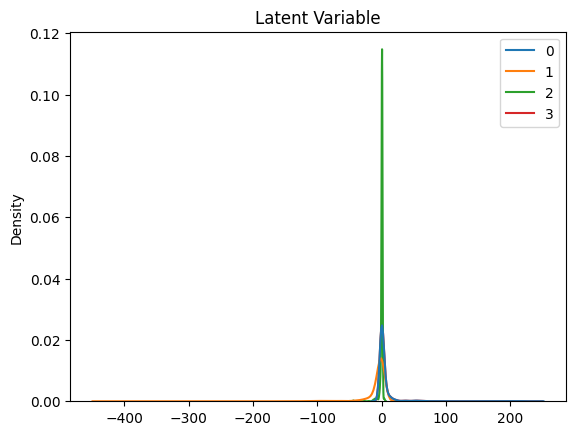

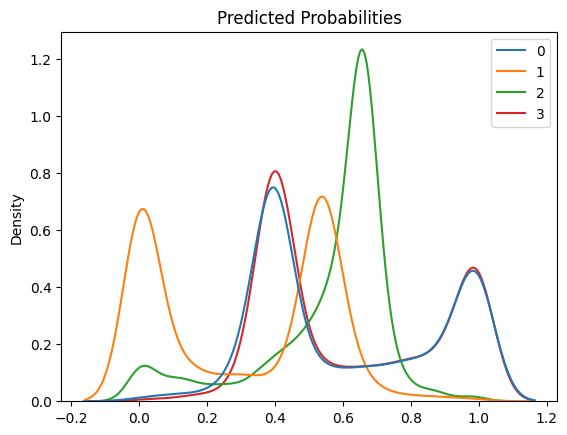

In [17]:
from sklearn.linear_model import LogisticRegression

# Outcome variable:
y = df['party']

# Create dummies:
X_n = df.loc[:,num_var]
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in cat_var:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)

X = pd.concat([X_n,dummies],axis=1)
X.columns = X.columns.astype(str)

# Fit logistic regression:
reg = LogisticRegression(fit_intercept=False).fit(X,y)
print('Accuracy: ', reg.score(X,y))

# Latent variable:
latent = np.matmul( X, reg.coef_.T  )
sns.kdeplot(latent).set_title('Latent Variable')
plt.show()

# Probability of default:
pr_hat = 1/(1+np.exp(-latent))
sns.kdeplot(pr_hat).set_title('Predicted Probabilities')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.3768506056527591


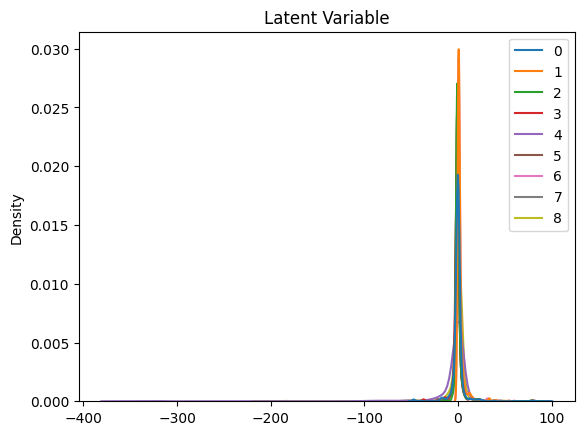

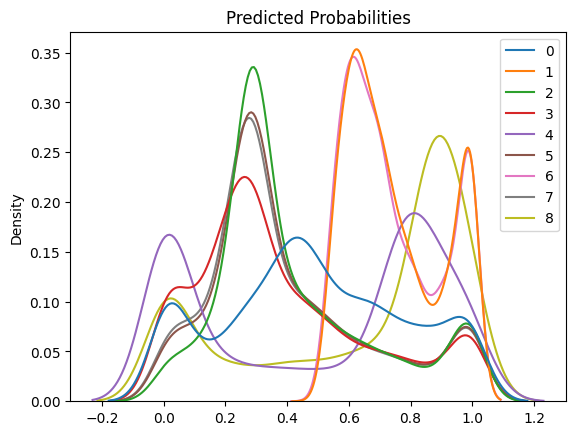

In [20]:
from sklearn.linear_model import LogisticRegression

# Outcome variable:
y = df['candidate']

# Create dummies:
X_n = df.loc[:,num_var]
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in cat_var:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)

X = pd.concat([X_n,dummies],axis=1)
X.columns = X.columns.astype(str)

# Fit logistic regression:
reg = LogisticRegression(fit_intercept=False).fit(X,y)
print('Accuracy: ', reg.score(X,y))

# Latent variable:
latent = np.matmul( X, reg.coef_.T  )
sns.kdeplot(latent).set_title('Latent Variable')
plt.show()

# Probability of default:
pr_hat = 1/(1+np.exp(-latent))
sns.kdeplot(pr_hat).set_title('Predicted Probabilities')
plt.show()

**1) Merge Data**

**Uploading ID's Code to make Visualizations**

In [ ]:
#Testing demographic file
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
dem.head()

#Drop first row
dem = dem.drop([0])
dem.head()

#Extracting Virginia data
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
dem_VA.head()

# modify the voting csv dataset to match the county names present in the demographics data
# change to title case and if the county doesnt end in "City", add "County"

def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = df.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))

voting_df.head()

# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']
voting_df.head()

# create merged dataframe
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})
dem_VA.head()


(134, 272)


<ipython-input-39-f5205ea2edf5>:3: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,county_name,COUNTYA,COUSUBA,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
2821,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1,NaN,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
2822,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3,NaN,...,5830,10158,7375,6827,3092,2070,816,3053,1031.0,349800
2823,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5,NaN,...,196,944,736,1478,1182,844,687,1849,504.0,104000
2824,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7,NaN,...,739,1173,839,1010,483,317,301,322,672.0,189800
2825,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9,NaN,...,704,2476,2409,2847,1599,1460,592,1454,582.0,142200


In [ ]:
#Final Merging
voting_original = pd.read_csv('./project_voting/data/voting_VA.csv')
voting_original.head(5)

# modify voting CSV
def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = voting_original.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))
voting_df.head()

# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']

# split voting data into separate years for merging
voting_2000 = voting_df[voting_df['year']==2000]
voting_2004 = voting_df[voting_df['year']==2004]
voting_2008 = voting_df[voting_df['year']==2008]
voting_2012 = voting_df[voting_df['year']==2012]
voting_2016 = voting_df[voting_df['year']==2016]
voting_2020 = voting_df[voting_df['year']==2020]


**2) EDA**

In [ ]:
train_data = pd.read_csv('./project_voting/data/voting_VA.csv')
test_data = pd.read_csv('./project_voting/data/voting_VA.csv')

# clean training data
train_data1 = train_data.loc[:['county_fips', 'candidatevotes', 'totalvotes']]

##convert party to value?

train_final = train_data1
train_final1 = train_final.dropna()

# clean testing data
test_data1 = test_data.loc[:['county_fips', 'candidatevotes','totalvotes']]

test_final = test_data1
test_final1 = test_final.dropna()


InvalidIndexError: ['county_fips', 'candidatevotes', 'totalvotes']

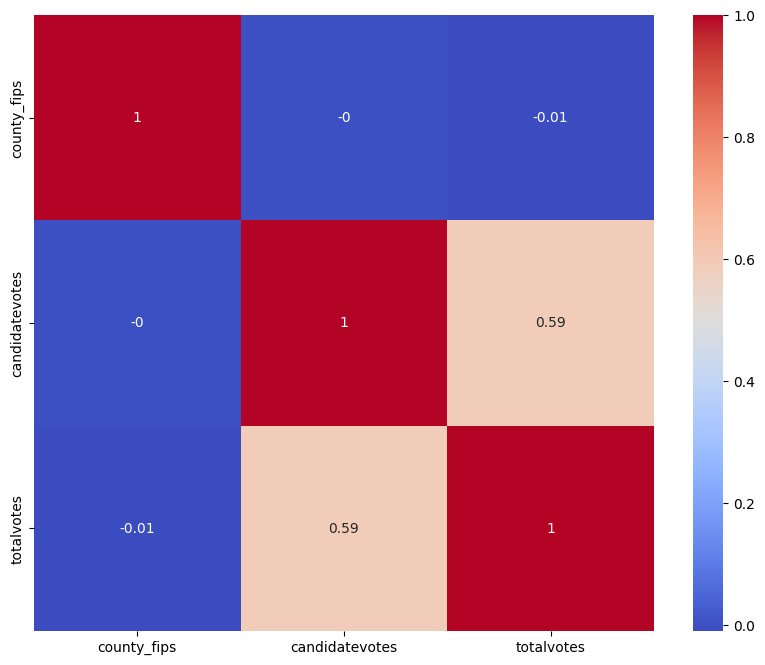

In [ ]:
corr_matrix = train_final.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

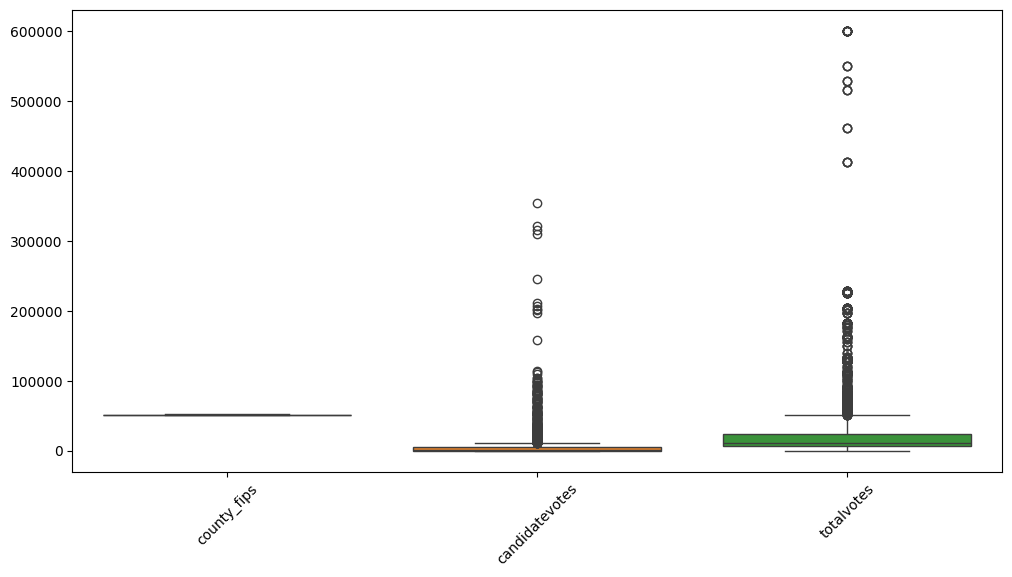

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_final)
plt.xticks(rotation=45)
plt.show()